# 泰坦尼克号生存竞赛

 <a href="https://www.kaggle.com/c/titanic/"> 泰坦尼克号生存竞赛 </a>   
 1912年4月15日, 在首航期间, 泰坦尼克号撞上一座冰山后沉没, 2224 名乘客和机组人员中有 1502 人遇难.
 导致生命损失的原因之一是没有足够的救生艇给乘客和船员.尽管幸存下来的运气有一些因素, 但一些人比其他人更有可能幸存下来，比如妇女, 儿童和上层阶级.

从泰坦尼克号的灾难中幸存下来或没有幸存的乘客的样本训练集（train.csv）中，如果测试数据集（test.csv）中的这些乘客幸存下来，我们的模型是否可以基于给定的测试数据集（test.csv）来确定。

 用到的主要模块

* <b>Pandas</b> 数据处理
* <b>Matplotlib</b> and <b> seaborn</b> 可视化
* <b>Numpy</b> 数据处理
* <b>sklearn</b> 机器学习模块

# 明确问题：分类问题

    1.数据可视化。
    2.数据清洗。
    3.建模。
    4.预测。

In [3]:
# 数据分析和整理
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## 导入数据和可视化

In [61]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [62]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_df.shape

(891, 12)

In [64]:
test_df.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [65]:
test_df.shape

(418, 11)

    Suvival = 1 表示存活的人
    survival        目标列，是否存活  
    pclass          乘坐的舱位级别 (1 = 1st; 2 = 2nd; 3 = 3rd)  ## 分类的
    name            姓名 ## 字符串
    sex             性别 ## 分类
    age             年龄 ## 数值型
    sibsp           兄弟姐妹的数量（乘客中）  ## 数值型
    parch           家庭相关变量  ## 数值型
    ticket          票号  ## 
    fare            票价  ## 数值型
    cabin           客舱号  
    embarked        登船的港口  

In [66]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [68]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


/Users/macbook/anaconda2/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


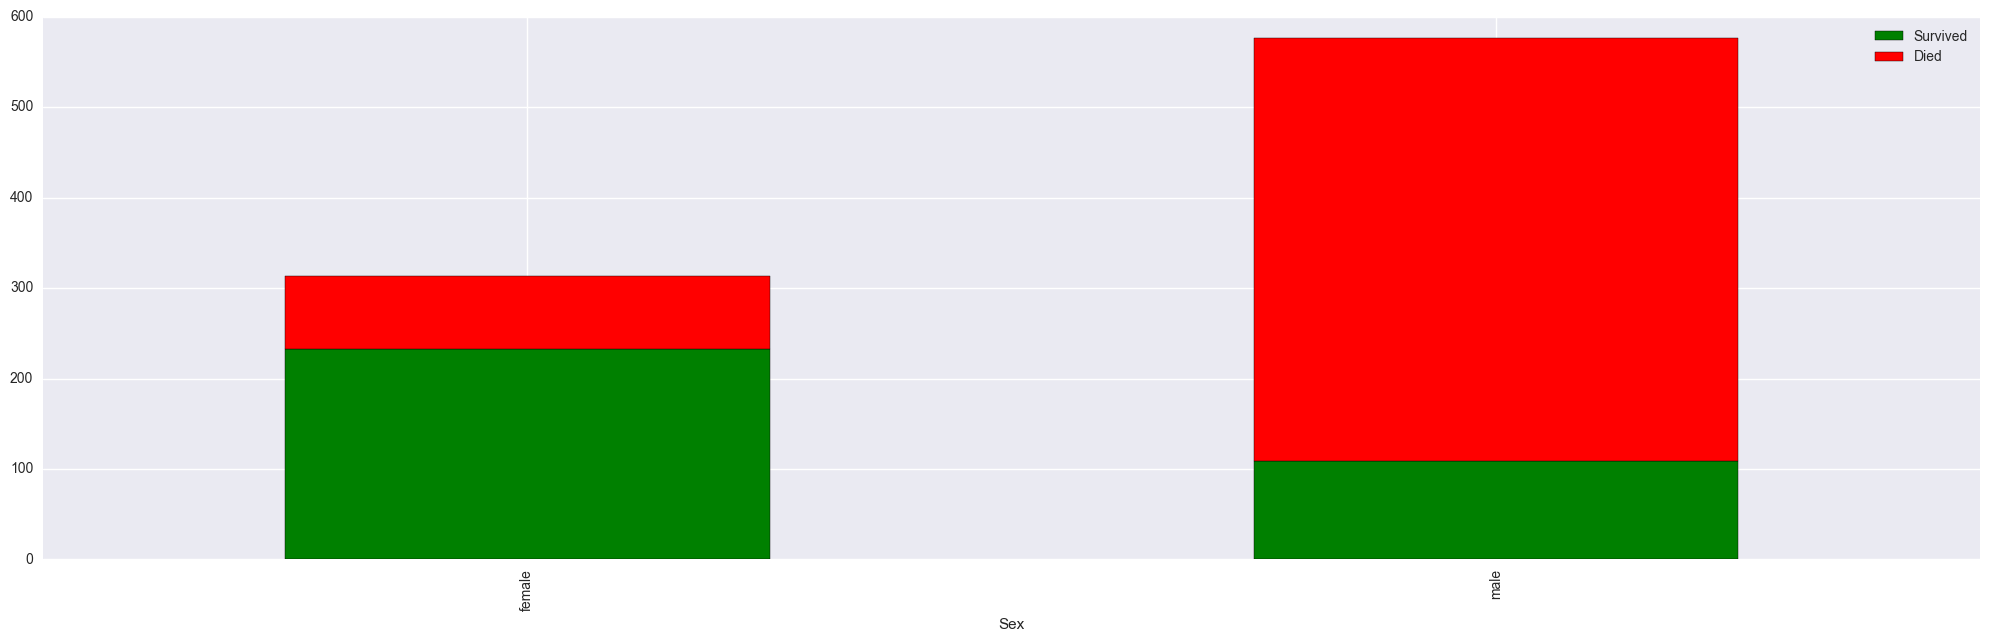

In [12]:
# 1 查看性别特征

train_df['Died'] = 1 - train_df['Survived']

train_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

In [69]:
# 2 Pclass 存活率的影响

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


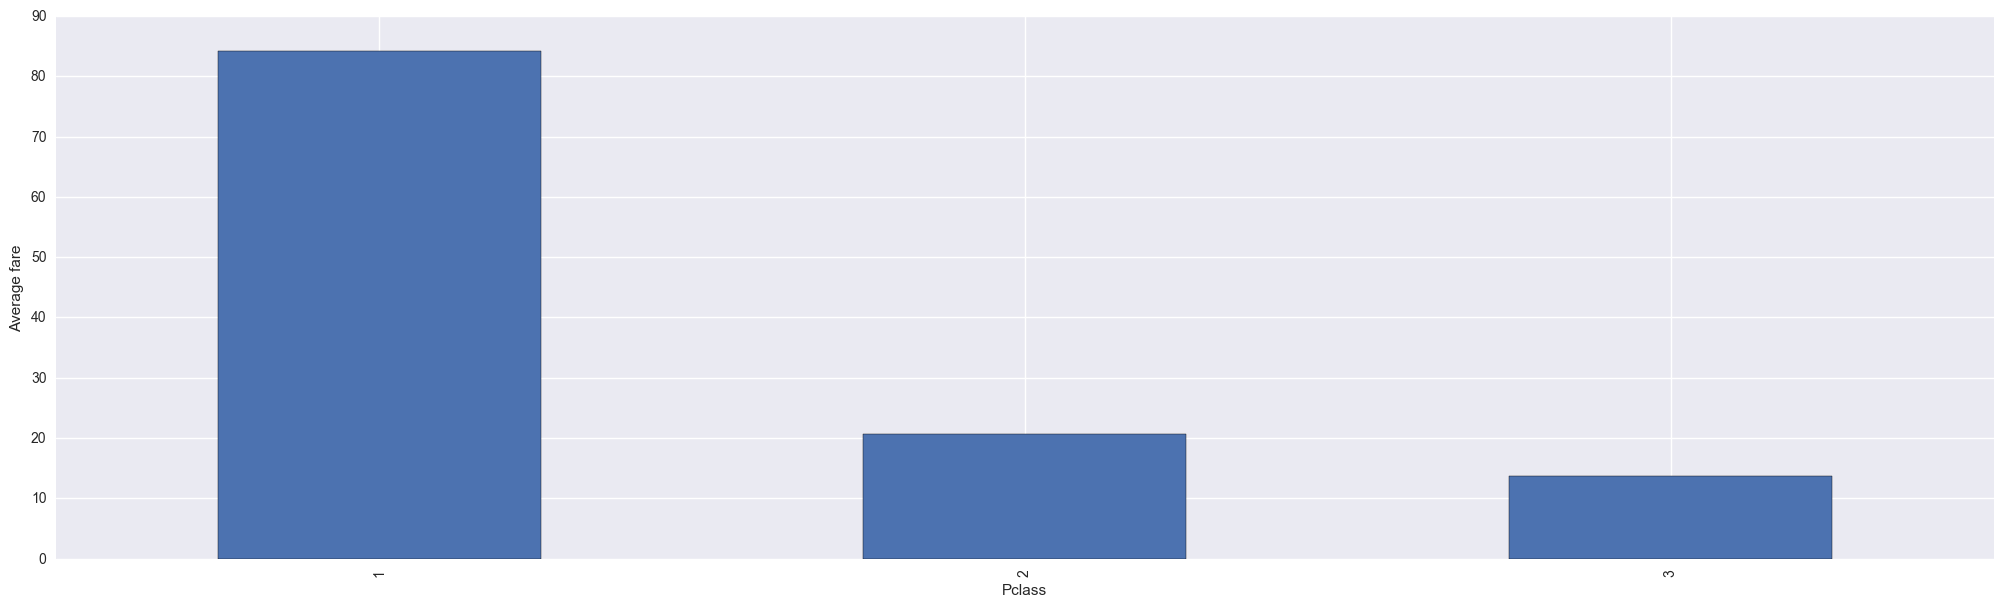

In [70]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
train_df.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

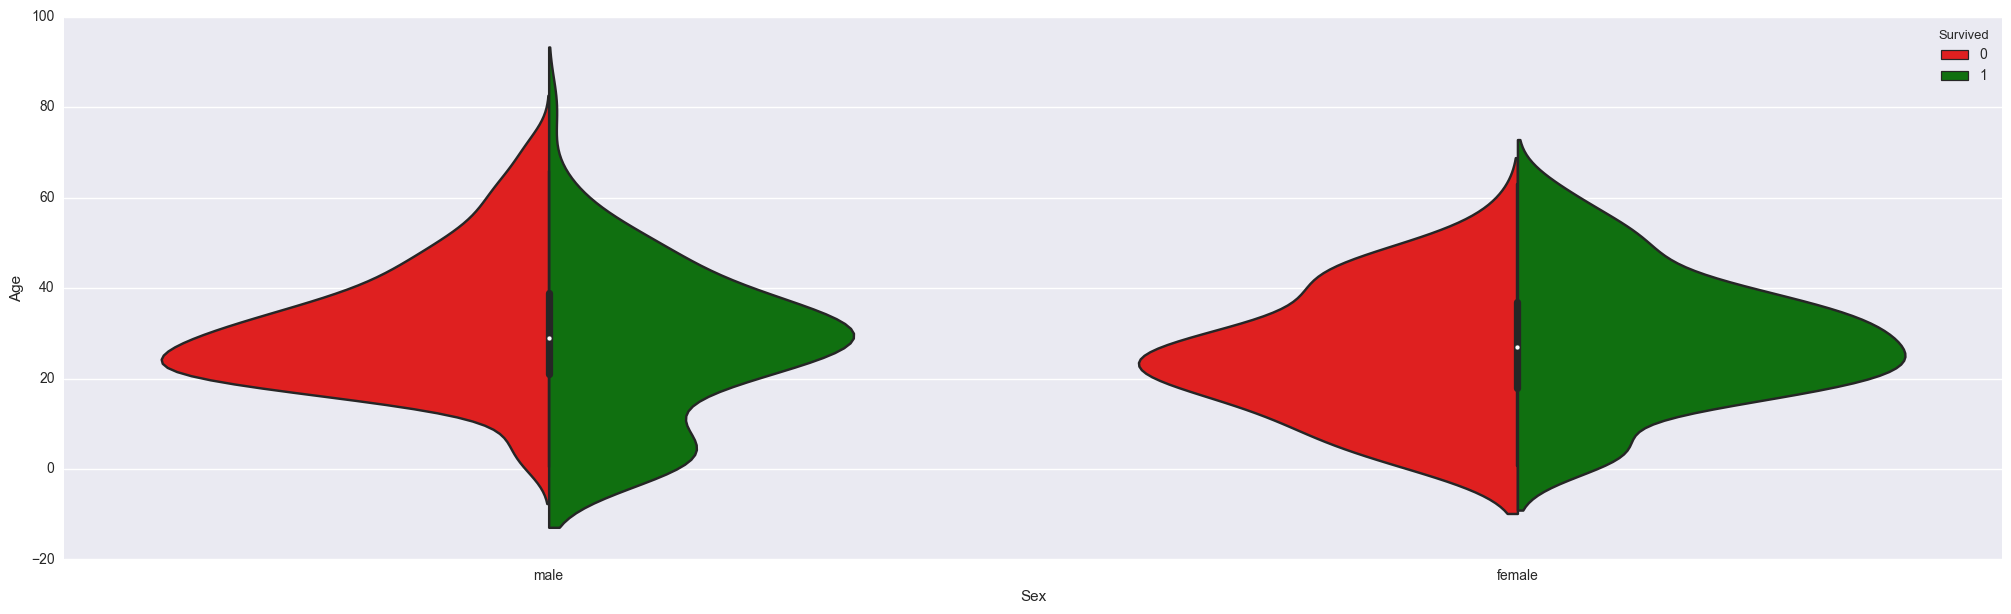

In [71]:
# 3 Age 存活率的影响

fig = plt.figure(figsize=(25, 7))
# Women and children first !
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train_df, 
               split=True,
               palette={0: "r", 1: "g"}
              );

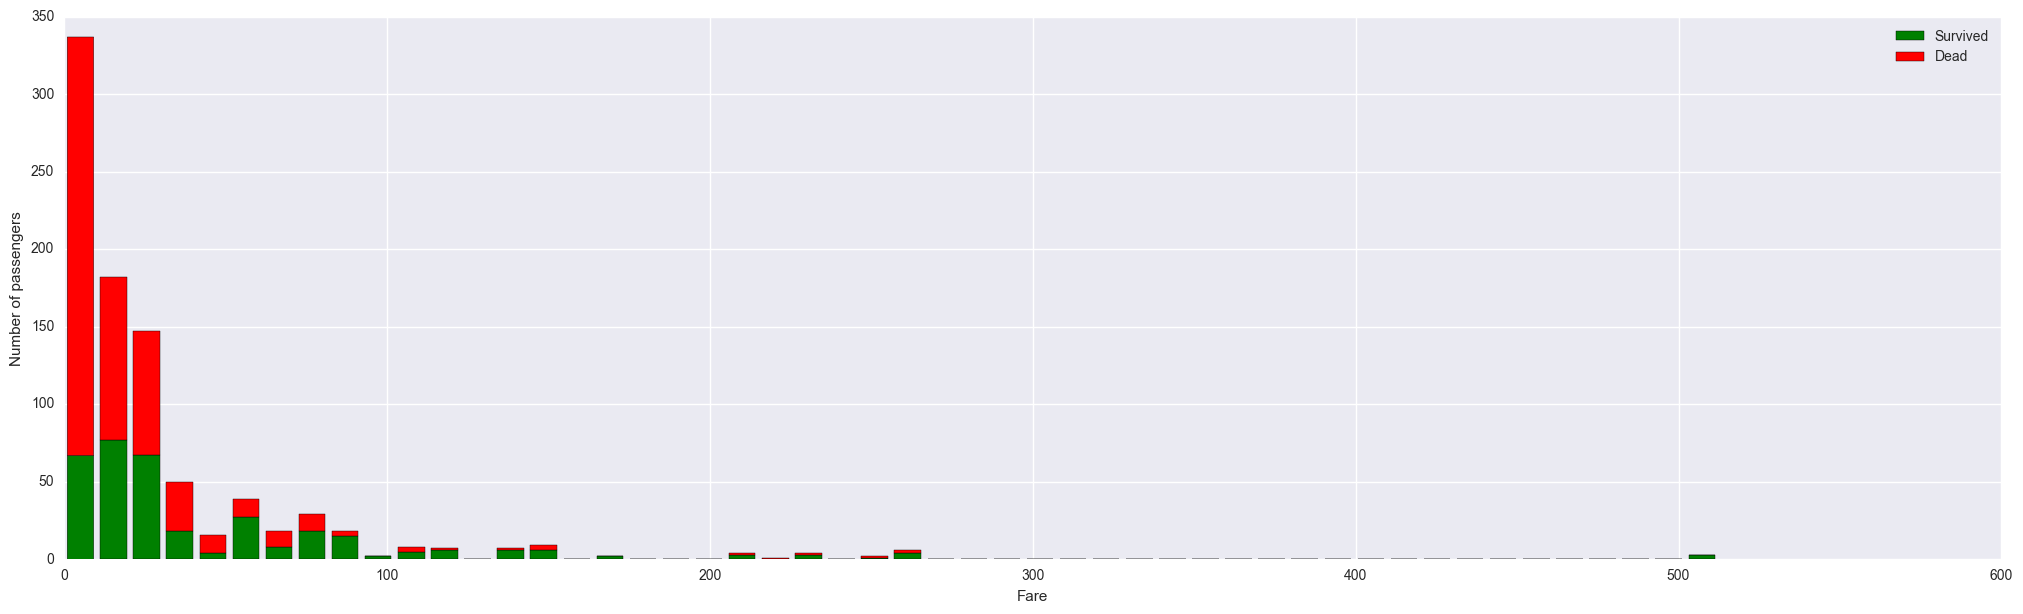

In [72]:
# 4、 Fare 对存活的影响。
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Survived'] == 1]['Fare'], train_df[train_df['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

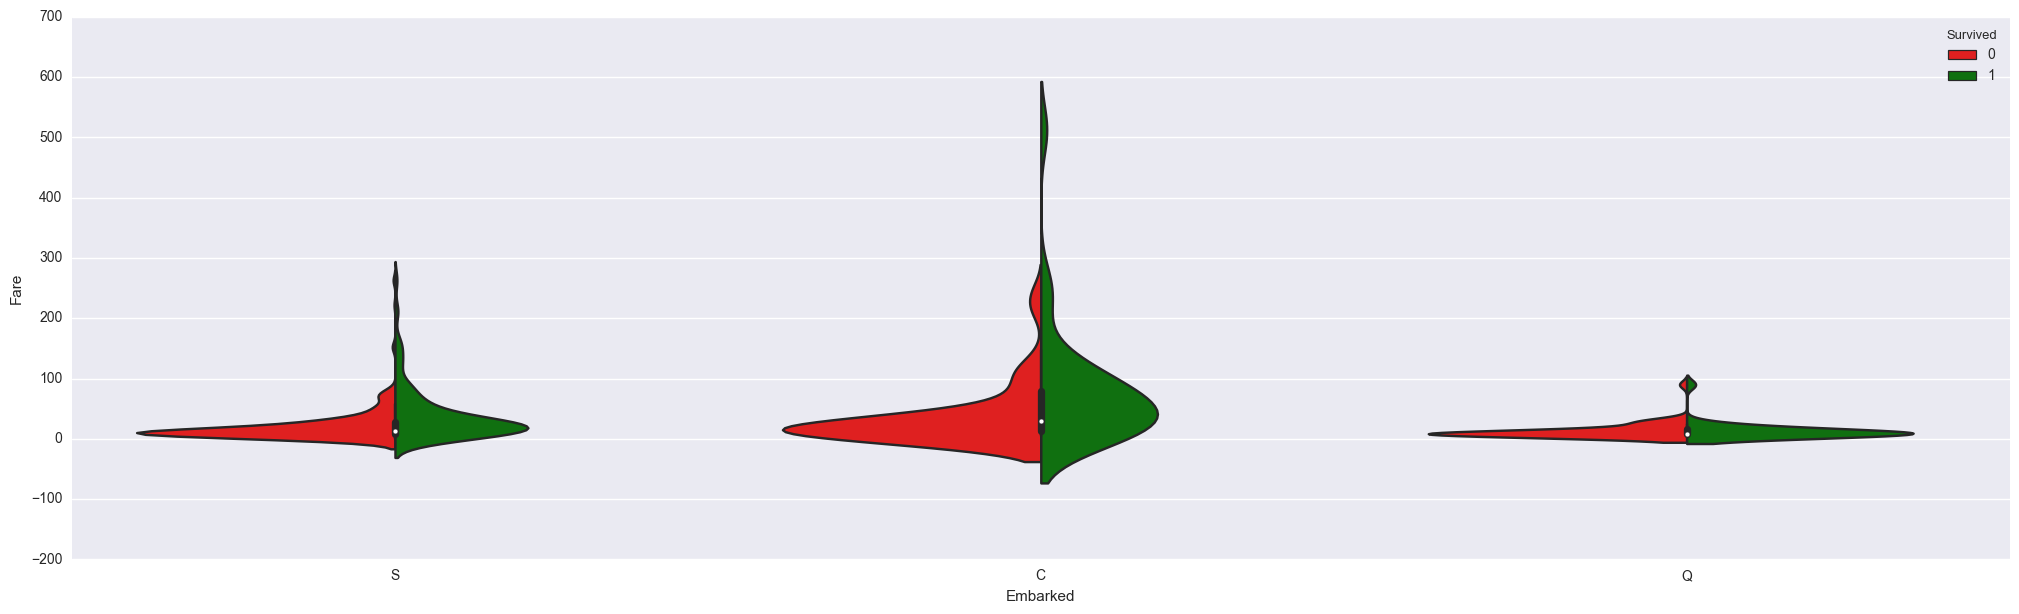

In [75]:
# 5、 Embarked 对生存的影响
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_df, split=True, palette={0: "r", 1: "g"});


    Completing（完整）.

    我们可能想要去补全丢失的 Age（年龄）特征，因为它肯定与生存相关.
    我们也想要去补全丢失的 Embarked（出发港）特征, 因为它也可能与生存或者其它重要的特征相关联.
    
    
    Correcting（校正）.
    
    Ticket（船票号码）特征可能会从我们的分析中删除, 因为它包含了很高的重复比例 (22%), 并且票号和生存之间可能没有关联.
    Cabin（房间号）特征可能因为高度不完整而丢失, 或者在 训练和测试数据集中都包含许多 null 值.
    PassengerId（旅客ID）可能会从训练数据集中删除, 因为它对生存来说没有贡献.
    Name（名称）特征是比较不规范的, 但是有用.
    
    
    根据前面提到的问题描述, 我们也可以增加我们的假设.

    Women (Sex=female) 更有可能幸存下来.
    Children (Age<?) 更有可能幸存下来.
    上层阶级的旅客 (Pclass=1) 更有可能幸存下来.

## 特征工程

目前为止，我们对于数据的样子基本有了了解，但是这些东西还是没有整理成能够作为特征的矩阵。而特征工程就是干这样的活的。


    三字诀 ： 

    删：没有必要的，无效的字段。
    改：补充缺失数据、字段数值化。
    增：特征组合，特征构造。

In [77]:
def get_combined_data():
    # 训练数据
    train = pd.read_csv('./data/train.csv')
    
    # 测试数据
    test = pd.read_csv('./data/test.csv')

    # 整合训练数据和测试数据 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # 
    # 移除索引和用户编号等无效信息字段
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined,train,test

In [78]:
combined,train,test = get_combined_data()

In [79]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 删

    根据我们之前的分析，我们需要删除的特征有：Ticket、Cabin


In [80]:
# train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
# test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
# combine = [train_df, test_df]

combined = combined.drop(['Ticket', 'Cabin'], axis=1)

# 改
Pclass 已经是一个数值，Pclass类别，可以利用哑元变量来处理。


In [81]:
def process_pclass():
    
    global combined
    # 分为三类:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # 增加哑元变量
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    
    return combined

In [82]:
combined = process_pclass()

In [83]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1.0,0.0,0.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0,0.0,1.0


Name

- Braund, <b> Mr.</b> Owen Harris	
- Heikkinen, <b>Miss.</b> Laina
- Oliva y Ocana, <b>Dona.</b> Fermina
- Peter, <b>Master.</b> Michael J


In [84]:
def get_titles():
    Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dona":"Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
    }
    # 从名字中提取称谓
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # 将各称谓映射到Title_Dictionary字典中用于归类
    # 
    combined['Title'] = combined.Title.map(Title_Dictionary)
    return combined

def process_names():
    global combined
    
    # 姓名变量用哑元表示
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
        
    return combined

In [85]:
combined = get_titles()

In [86]:
combined = process_names()

In [87]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0


    处理性别，将字符串映射为0，1数值变量

In [88]:
def process_sex():
    global combined
    # 映射Sex为数值变量 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0}).astype(int)
    return combined

In [89]:
combined=process_sex()

In [90]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0


    处理Age，这个字段有缺失值，因此需要进行填充，简单粗暴的做法就是用'Sex', 'Pclass', 'Title'来预测我们的年龄。
    

In [91]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [110]:
train.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
grouped_median_train

,Sex,Pclass,Title,Age
0,0,1,Miss,30.0
1,0,1,Mrs,40.0
2,0,1,Officer,49.0
3,0,1,Royalty,40.5
4,0,2,Miss,24.0
5,0,2,Mrs,31.5
6,0,3,Miss,18.0
7,0,3,Mrs,31.0
8,1,1,Master,4.0
9,1,1,Mr,40.0


In [93]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # 填充年龄缺失值
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return combined

In [94]:
combined = process_age()

In [95]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0


处理票价字段

In [97]:
def process_fares():
    global combined
    # 对于缺失的用均值替代
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    return combined

In [98]:
combined = process_fares()

In [99]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0


    处理Embarked字段

In [100]:
def process_embarked():
    global combined
    # 缺失值用众数替代
    combined.Embarked.fillna('S', inplace=True)
    # 进行哑元编码 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    return combined

In [101]:
combined =  process_embarked()

In [102]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Miss,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1.0,0.0,0.0,Mrs,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Mr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# 增


    增加家庭特征

In [104]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1


In [105]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


    最后删除不需要的特征字段

In [106]:
del_list=['Name','Pclass','Title']
for iname in del_list:
    del combined[iname]

In [107]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
4,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [108]:
combined.shape

(1309, 18)

# 建模与预测

    重构训练测试数据

In [112]:
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier # GBDT  
from sklearn.model_selection import cross_val_score # 交叉验证
from sklearn.linear_model import LogisticRegression # LR 
from sklearn.tree import DecisionTreeClassifier #决策树
from xgboost.sklearn import XGBClassifier # 封装到sklearn

In [113]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [114]:
train, test, targets = recover_train_test_target()

In [115]:
train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
4,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [116]:
train.shape

(891, 18)

In [52]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize
891,1,34.5,0,0,7.8292,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
892,0,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
893,1,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
894,1,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
895,0,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3


In [117]:
test.shape

(418, 18)

In [118]:
targets

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [120]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [122]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
xgboost = XGBClassifier()
models = [logreg,dt, rf, gboost, xgboost]

In [123]:
for model in models:
    print 'Cross-validation of : {0}'.format(model.__class__)
    score = compute_score(clf=model, X=train, y=targets, scoring='accuracy')
    print 'CV score = {0}'.format(score)
    print '****'


Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.827196841464
****
Cross-validation of : <class 'sklearn.tree.tree.DecisionTreeClassifier'>
CV score = 0.77888067432
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.794668356156
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.824924045681
****
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 0.835049243081
****


/Users/macbook/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/macbook/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/macbook/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/macbook/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty ar

In [124]:
xgboost.fit(train,targets)
xgboost.predict(test)

/Users/macbook/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,